### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja ['loja_id'] = 1
loja2 = pd.read_csv(url2)
loja2 ['loja_id'] = 2
loja3 = pd.read_csv(url3)
loja3 ['loja_id'] = 3
loja4 = pd.read_csv(url4)
loja4 ['loja_id'] = 4



loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja_id
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


In [5]:
vendas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
vendas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja_id
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


#1. Análise do faturamento


In [6]:

faturamento_por_loja = vendas.groupby('loja_id')['Preço'].sum().reset_index()
faturamento_por_loja.columns = ['Loja', 'Faturamento Total (R$)']
faturamento_por_loja['Faturamento Total (R$)'] = faturamento_por_loja['Faturamento Total (R$)'].apply(lambda x: f"R$ {x:,.2f}".replace(',', '.'))

faturamento_por_loja


,Loja,Faturamento Total (R$)
0,1,R$ 1.534.509.12
1,2,R$ 1.488.459.06
2,3,R$ 1.464.025.03
3,4,R$ 1.384.497.58


In [7]:
import matplotlib.pyplot as plt

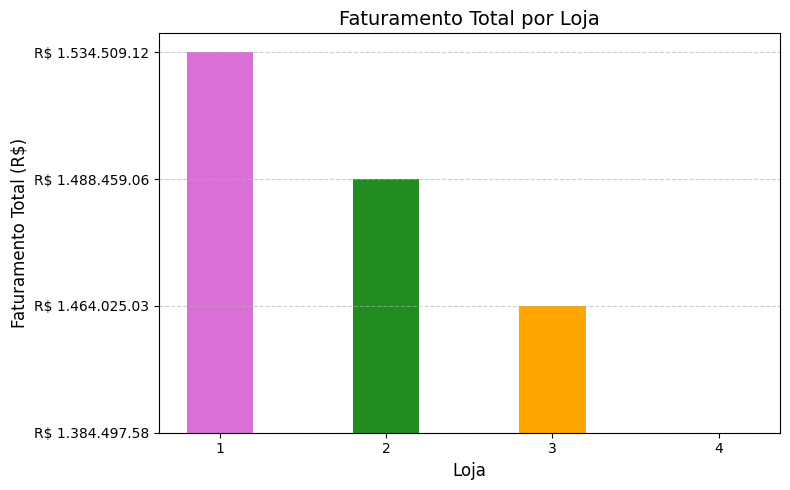

In [8]:

cores = ['royalblue', 'orange', 'forestgreen', 'orchid']
faturamento_por_loja = faturamento_por_loja.sort_values('Faturamento Total (R$)', ascending=True)
plt.figure(figsize=(8, 5))
plt.bar(faturamento_por_loja['Loja'], faturamento_por_loja['Faturamento Total (R$)'], color=cores, width=0.4)
plt.title('Faturamento Total por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(faturamento_por_loja['Loja'])

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.show()

# 2. Vendas por Categoria


In [10]:

categorias_populares = (
    vendas.groupby(['loja_id', 'Categoria do Produto'])['Produto'].count().reset_index().rename(columns={'Produto': 'Quantidade de Vendas'}))
categorias_populares_top1 = categorias_populares.sort_values(['loja_id', 'Quantidade de Vendas'], ascending=[True, False]) .groupby('loja_id') .head(1)

print(" Categoria mais popular por loja:")
print(categorias_populares_top1)


 Categoria mais popular por loja:
    loja_id Categoria do Produto  Quantidade de Vendas
6         1               moveis                   465
14        2               moveis                   442
22        3               moveis                   499
30        4               moveis                   480


# 3. Média de Avaliação das Lojas

In [11]:

media_geral_avaliacao = vendas['Avaliação da compra'].mean()
print(f"Média geral da avaliação dos clientes: {media_geral_avaliacao:.2f}")


Média geral da avaliação dos clientes: 4.01


In [12]:

media_avaliacao_por_loja = vendas.groupby('loja_id')['Avaliação da compra'].mean().reset_index()
media_avaliacao_por_loja.columns = ['Loja', 'Média de Avaliação']
media_avaliacao_por_loja['Média de Avaliação'] = media_avaliacao_por_loja['Média de Avaliação'].round(2)

print("Média de avaliação por loja:")
print(media_avaliacao_por_loja)


Média de avaliação por loja:
   Loja  Média de Avaliação
0     1                3.98
1     2                4.04
2     3                4.05
3     4                4.00


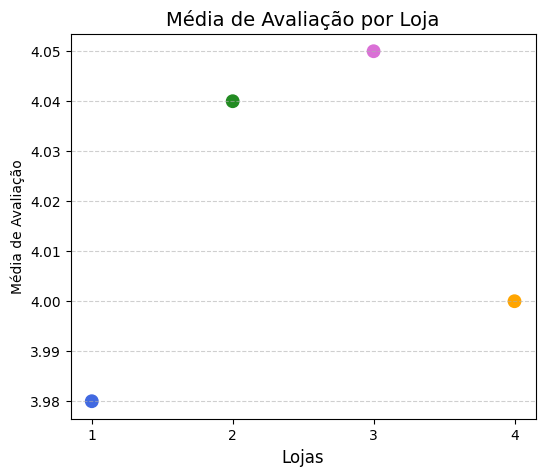

In [13]:

cores = ['royalblue', 'orange', 'forestgreen', 'orchid']
media_avaliacao_por_loja = media_avaliacao_por_loja.sort_values('Média de Avaliação', ascending=True)
plt.figure(figsize=(6, 5))
plt.scatter(media_avaliacao_por_loja['Loja'], media_avaliacao_por_loja['Média de Avaliação'], color=cores, s=80 )
plt.title('Média de Avaliação por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=10)
plt.xticks(media_avaliacao_por_loja['Loja'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [14]:
produtos_vendidos = (
    vendas.groupby(['loja_id', 'Produto'])['Produto'].count().reset_index(name='Quantidade'))

produto_mais_vendido = produtos_vendidos.sort_values(['loja_id', 'Quantidade'], ascending=[True, False]) .groupby('loja_id') .head(1)

produto_menos_vendido = produtos_vendidos.sort_values(['loja_id', 'Quantidade'], ascending=[True, True]) .groupby('loja_id') .head(1)


print("\n Produto mais vendido por loja:")
print(produto_mais_vendido)

print("\n Produto menos vendido por loja:")
print(produto_menos_vendido)


 Produto mais vendido por loja:
     loja_id                   Produto  Quantidade
24         1             Guarda roupas          60
79         2  Iniciando em programação          65
134        3             Kit banquetas          57
161        4                  Cama box          62

 Produto menos vendido por loja:
     loja_id            Produto  Quantidade
11         1       Celular ABXY          33
82         2  Jogo de tabuleiro          32
105        3   Blocos de montar          35
178        4           Guitarra          33


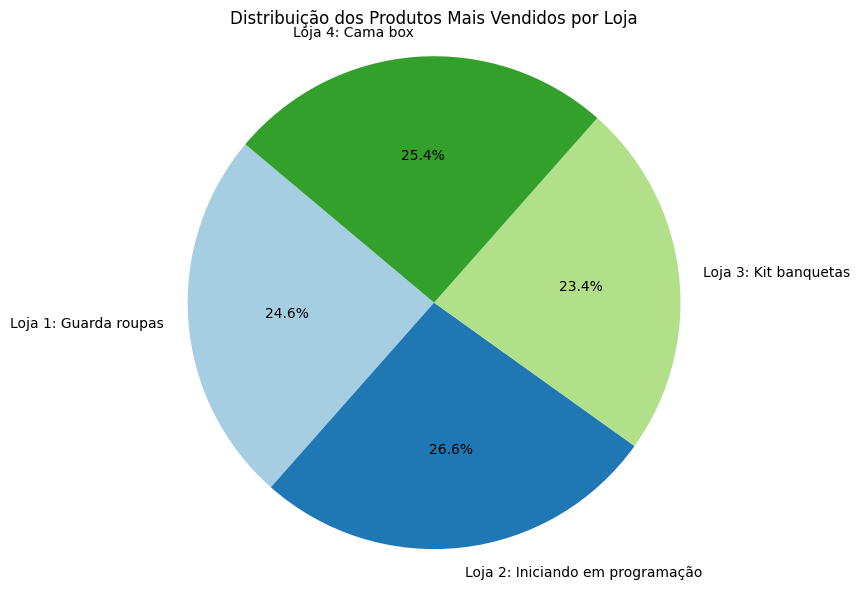

In [27]:

labels = [f"Loja {row['loja_id']}: {row['Produto']}" for _, row in produto_mais_vendido.iterrows()]
sizes = produto_mais_vendido['Quantidade']
colors = plt.cm.Paired.colors[:len(labels)]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição dos Produtos Mais Vendidos por Loja')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [28]:

frete_medio_por_loja = vendas.groupby('loja_id')['Frete'].mean().reset_index()
frete_medio_por_loja.columns = ['Loja', 'Frete Médio (R$)']
frete_medio_por_loja['Frete Médio (R$)'] = frete_medio_por_loja['Frete Médio (R$)'].round(2)

print(frete_medio_por_loja)

   Loja  Frete Médio (R$)
0     1             34.69
1     2             33.62
2     3             33.07
3     4             31.28


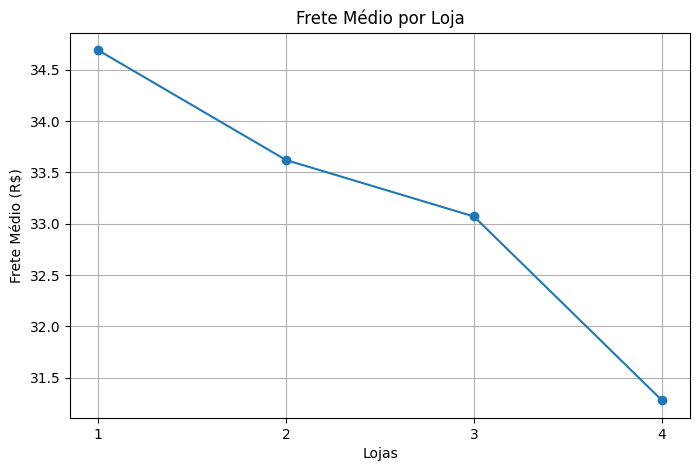

In [29]:

plt.figure(figsize=(8, 5))
plt.plot(frete_medio_por_loja['Loja'], frete_medio_por_loja['Frete Médio (R$)'], marker='o', linestyle='-')
frete_medio_por_loja = frete_medio_por_loja.sort_values('Frete Médio (R$)', ascending=False)
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.xticks(frete_medio_por_loja['Loja'])
plt.grid(True)
plt.show()

**Relatório Final**

Com base nas análises realizadas e nos gráficos gerados, a loja com menos desempenho é a Loja 4.
Os dados obtidos pós análise foram:

* Menor faturamento R$ 1.384.497,58
* Avaliação de clientes é boa, mas ligeiramente inferior às lojas 2 e 3
* Frete médio mais barato, mas isso não compensou o desempenho geral
* Categoria de maior venda igual às outras (móveis), mas em menor volume.

A recomendação com base no faturamento, popularidade e logística, considera a Loja 4 a mais indicada para venda.